## 한글 폰트 지정

<br>

- 윈도우에 있는 폰트 파일의 위치를 지정한 다음
- 폰트 파일의 설정에서 이름 정보를 조회,
- 폰트 파일의 이름을 matplotlib에 설정.

<br>
    
    참고1) https://jinyes-tistory.tistory.com/70
    참고2) https://studioplug.tistory.com/333
    
<br>

* 근데 글꼴을 HYCYSM.TTF로 해놓고 하니 된다. 다른건 오류나는데...

In [11]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib
import numpy as np
import math

# 과연 이거는 될까? 
font_location = 'C:/Windows/Fonts/HYCYSM.TTF'
font_name = fm.FontProperties(fname = font_location).get_name()
matplotlib.rc('font', family=font_name)

**Line 차트 중복으로 그리기**

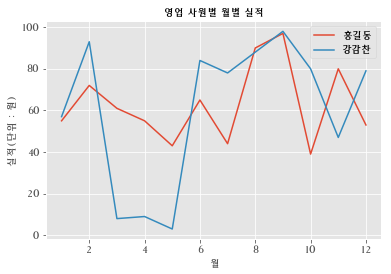

In [12]:
# 샘플 데이터 - 사원별, 월별 실적을 랜덤으로 생성.
np.random.seed(0) # 난수 생성 규칙.
hong = np.ceil(np.random.rand(12) * 100)
kang = np.ceil(np.random.rand(12) * 100)
date = np.arange(1, 13)

# Line 그래프 설정
plt.style.use('ggplot')
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(date, hong, label = '홍길동')
ax.plot(date, kang, label = '강감찬')

# fontproperties에서 앞서 설정한 font를 지정해줘야 한글이 멀쩡히 나옴. 과연?
# 깨지는데요
# HYCYSM.TTF 이거로 하니 된다. 왜??????? gulim이나 batang은 안되던데
ax.set_title('영업 사원별 월별 실적', fontproperties = font_name)
ax.set_xlabel('월', fontproperties = font_name)
ax.set_ylabel('실적(단위 : 원)', fontproperties = font_name)
ax.legend()
plt.show()

**bar차트 중복으로 그리기**

In [13]:
import pandas as pd

df = pd.read_csv('UseData/1군전염병발병현황_년도별_2.csv',
                 encoding='euc-kr', index_col='년도')
df.head(10)

,콜레라,장티푸스,이질,대장균
년도,,,,
2002년,4,221,767,8
2003년,1,199,1117,52
2004년,10,174,487,118
2005년,16,219,317,43
2006년,5,200,389,37
2007년,7,223,131,41
2008년,5,188,209,58
2009년,0,168,180,62
2010년,8,133,228,56


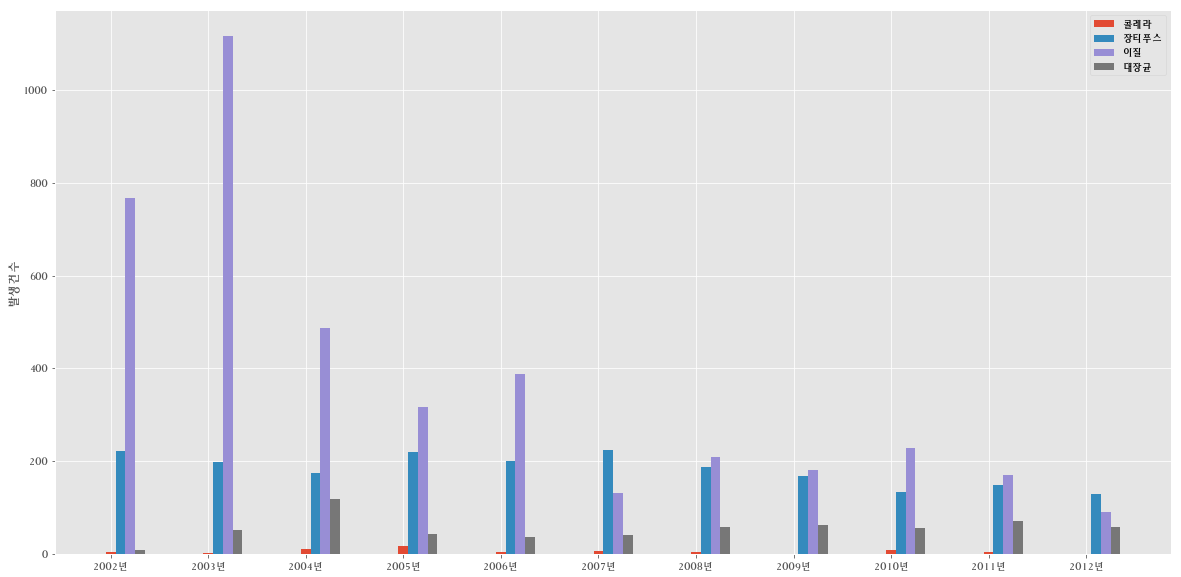

In [16]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)

# 연도 개수만큼 구간 분할.
wt = np.array(range(len(df)))
w = 0.1

# for문을 이용해 column별로 막대그래프 생성.
for i in df.columns :
    ax.bar(wt, df[i], width=w, label = i)
    wt = wt + w
    
ax.set_xticks(np.array(range(len(df))))
ax.set_xticklabels(df.index, fontproperties = font_name)
ax.set_ylabel('발생건수')
ax.legend()
plt.show()

**Line & Bar 동시 사용**

In [17]:
df2 = pd.read_csv('UseData/주가변동.csv', encoding='euc-kr', index_col=0)
df2.head(10)

,시작가,장중고가,장중저가,종가,거래금액
날짜,,,,,
2010-01-04,1600.0,1600.0,1580.0,1597.0,5600.0
2010-01-05,1597.0,1605.0,1590.0,1600.0,14800.0
2010-01-06,1600.0,1602.0,1579.0,1601.0,8300.0
2010-01-07,1600.0,1600.0,1590.0,1595.0,3700.0
2010-01-08,1599.0,1601.0,1595.0,1600.0,32300.0
2010-01-12,1582.0,1624.0,1582.0,1610.0,7200.0
2010-01-13,1602.0,1619.0,1595.0,1605.0,7100.0
2010-01-14,1605.0,1749.0,1605.0,1729.0,45600.0
2010-01-15,1715.0,1725.0,1680.0,1705.0,20400.0


C:\Users\skdbs\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\skdbs\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\skdbs\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


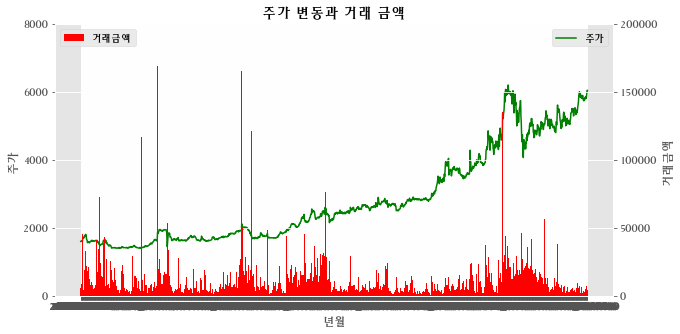

In [19]:
# Line차트 먼저 그리기
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(111)
plt.style.use('ggplot')

ax1.plot(df2.index, df2['종가'], color = 'g', label = '주가')
# plt.show()

# 1개의 X축에 2개의 Y축 설정
ax2 = ax1.twinx()
ax2.bar(df2.index, df2['거래금액'], color = 'r', label = '거래금액', width = 2)

# 축과 레이블 값 지정.
ax1.set_yticks([i * 2000 for i in range(5)])
ax1.set_ylabel('주가')
ax1.set_xlabel('년월')

ax2.set_yticks([i * 50000 for i in range(5)])
ax2.set_ylabel('거래금액')

ax1.set_title('주가 변동과 거래 금액')

# 범례 설정 (0 : best)
ax1.legend(loc=1) # 1 : upper right
ax2.legend(loc=2) # 2 : upper left

plt.show()

**Scatter 차트 응용**

In [20]:
# 주요 애니메이션 영화 평점을 산포도 그래프를 그려 평점 패턴 찾기
import pandas as pd

df3 = pd.read_csv('UseData/ani_info.csv', encoding = 'euc-kr', index_col = 'anime_id')
df3.head(10)

,name,genre,type,rating,vote_no
anime_id,,,,,
32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,9.37,200630
5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,9.26,793665
28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,9.25,114262
9253,Steins;Gate,"Sci-Fi, Thriller",TV,9.17,673572
9969,Gintama',"Action, Comedy, Historical, Parody, Samurai, S...",TV,9.16,151266
32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,9.15,93351
11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,9.13,425855
820,Ginga Eiyuu Densetsu,"Drama, Military, Sci-Fi, Space",OVA,9.11,80679
15335,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,"Action, Comedy, Historical, Parody, Samurai, S...",Movie,9.10,72534


In [22]:
# vote_no가 80000 이상인 작품만 골라내기
df3.loc[df3['vote_no'] >= 80000, ['name', 'vote_no']]

,name,vote_no
anime_id,,
32281,Kimi no Na wa.,200630
5114,Fullmetal Alchemist: Brotherhood,793665
28977,Gintama°,114262
9253,Steins;Gate,673572
9969,Gintama',151266
...,...,...
17513,Diabolik Lovers,107960
32438,Mayoiga,117090
31904,Big Order (TV),84079


In [23]:
# vote_no가 600000개 이상이면서 평점이 8 이상인 작품만 골라내기
df3.loc[ (df3['vote_no'] > 600000) & (df3['rating'] >= 8), ['name', 'rating']]

,name,rating
anime_id,,
5114,Fullmetal Alchemist: Brotherhood,9.26
9253,Steins;Gate,9.17
1575,Code Geass: Hangyaku no Lelouch,8.83
1535,Death Note,8.71
16498,Shingeki no Kyojin,8.54
4224,Toradora!,8.45
6547,Angel Beats!,8.39
121,Fullmetal Alchemist,8.33
10620,Mirai Nikki (TV),8.07


In [24]:
# 장르별로 골라내기
types = df3['type'].unique()
types

array(['Movie', 'TV', 'OVA', 'Special', 'Music', 'ONA'], dtype=object)

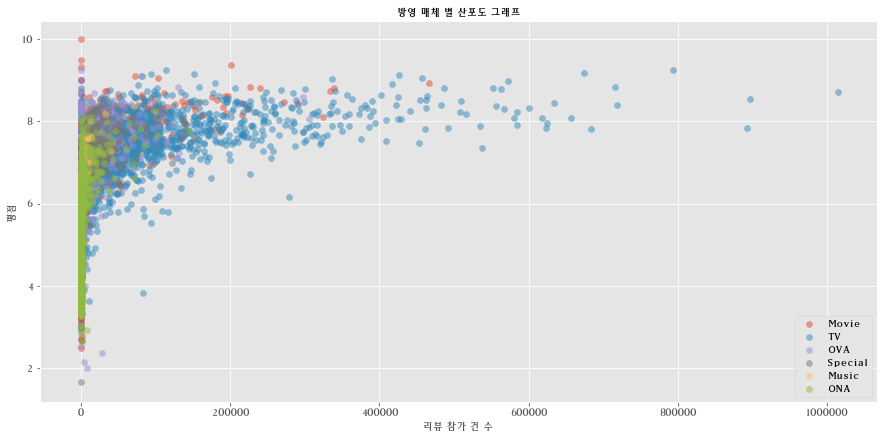

In [25]:
# 산포도 그래프로 시각화
fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(111)

for t in types :
    x = df3.loc[df3['type'] == t, 'vote_no']
    y = df3.loc[df3['type'] == t, 'rating']
    
    ax.scatter(x, y, alpha = 0.5, label = t)
    
ax.set_title('방영 매체 별 산포도 그래프', fontproperties = font_name)
ax.set_xlabel('리뷰 참가 건 수', fontproperties = font_name)
ax.set_ylabel('평점', fontproperties = font_name)

ax.legend(loc = 'lower right', fontsize = 10)
plt.show()

**Pie차트 활용**

In [26]:
c_df = pd.read_csv('UseData/1군전염병발병현황_년도별_2.csv',
                   encoding='euc-kr', index_col='년도')
c_df.head(10)

,콜레라,장티푸스,이질,대장균
년도,,,,
2002년,4,221,767,8
2003년,1,199,1117,52
2004년,10,174,487,118
2005년,16,219,317,43
2006년,5,200,389,37
2007년,7,223,131,41
2008년,5,188,209,58
2009년,0,168,180,62
2010년,8,133,228,56


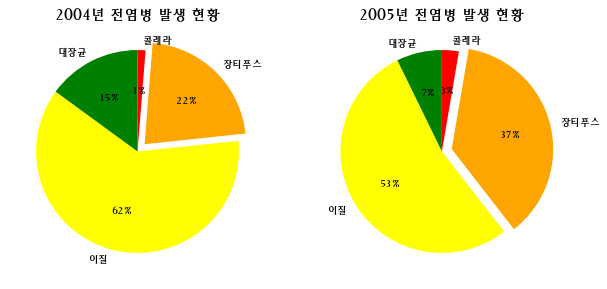

In [29]:
# 2004년과 2005년에 발생한 전염병들을 pie chart로 비교시각화
c_df_2004 = c_df.iloc[2]
c_df_2005 = c_df.iloc[3]

fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# 색 설정
color = ('red', 'orange', 'yellow', 'green')

# 파이차트 그리기
ax1.pie(c_df_2004,
        explode = (0, 0.1, 0, 0),
        labels = c_df_2004.index,
        autopct = '%1.0f%%',
        colors = color,
        startangle = 90, counterclock = False)

ax2.pie(c_df_2005,
        explode = (0, 0.1, 0, 0),
        labels = c_df_2005.index,
        autopct = '%1.0f%%',
        colors = color,
        startangle = 90, counterclock = False)

ax1.set_title('2004년 전염병 발생 현황')
ax2.set_title('2005년 전염병 발생 현황')

fig.subplots_adjust(wspace = 0.2) # 두 그래프 사이 간격 조정
plt.show()